# Task # 2 - To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a <b>simple linear regression </b>task as it involves just two variables.

In [27]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [28]:
#loading the dataset
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [29]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [30]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

From this we can infer that our datset contains 2 columns whose datatype is Hours:-float64 , Scores:-int64 type which means they are continuous variables.

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.shape

(25, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C2D6D1C48>,
      dtype=object)

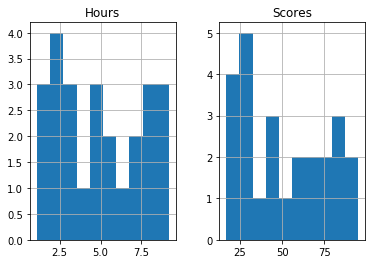

In [31]:
df=data[['Hours','Scores']]
df.hist()

We can conclude from the above histograms that max students study for 0-2.5 hrs and mostly students have scored between 20-30 marks

## To check is any outliers are present

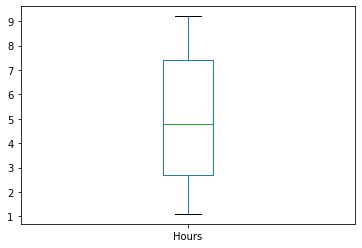

In [9]:
data['Hours'].plot.box()

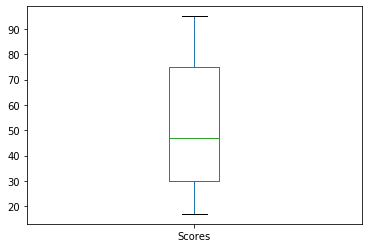

In [10]:
data['Scores'].plot.box()

Since we see no values are present outside the boxplot we can conclude that the dataset contains no outliers.

## To find the relation between No. of hours studied ans Scores achieved.

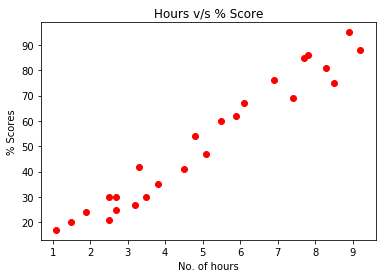

In [11]:
plt.scatter(data.Hours,data.Scores, color='red')
plt.xlabel("No. of hours")
plt.ylabel("% Scores")
plt.title("Hours v/s % Score")
plt.show()

From the above graph we can infer that there is a positive linear relation between the variables.

## Splitting the train and test data

We will now split the data into train and test dataset where our target variable is:<b> Score</b> whereas <b> Hours </b> is independent variable.

In [32]:
#splitting of dependent and independent variable
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [33]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split( X,y ,test_size=0.2, random_state=0)

## Building the Model

In [34]:
from sklearn.linear_model import LinearRegression  
lreg = LinearRegression()  
lreg.fit(X_train,y_train) 

print("Successfully fitted the model")

#to find the coefficient and intercept of fit line
print ('Coefficients: ', lreg.coef_[0])
print ('Intercept: ',lreg.intercept_)

Successfully fitted the model
Coefficients:  9.910656480642237
Intercept:  2.018160041434683


Coefficient and Intercept in the simple linear regression, are the parameters of the fit line.

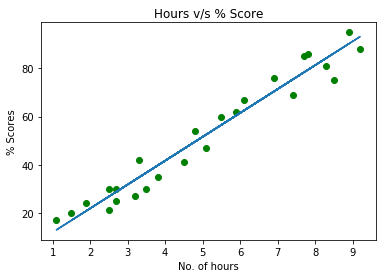

In [15]:
plt.scatter(X,y, color='green')
plt.plot(X, lreg.coef_*X + lreg.intercept_)
plt.xlabel("No. of hours")
plt.ylabel("% Scores")
plt.title("Hours v/s % Score")
plt.show()


### Making predictions:

In [16]:
prediction = lreg.predict(X_test) # Predicting the scores
print(prediction)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [39]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted':prediction})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [37]:
#We can predict our own values
hours = 9.25
#hours=int(input("Enter hrs:"))
hours=np.array(hours).reshape(-1,1)
pred = lreg.predict(hours)
print("No of Hours = ",hours[0])
print("Predicted Score =",pred[0])

No of Hours =  [9.25]
Predicted Score = 93.69173248737538


## Evaluation of model:

In [26]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction -y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_test) ** 2))
print("R2-score: %.2f" % r2_score(prediction, y_test))
R2=r2_score(prediction, y_test)*100
print(R2)

Mean absolute error: 4.18
Residual sum of squares (MSE): 21.60
R2-score: 0.95
95.46785947197246
